<a href="https://colab.research.google.com/github/AlejandroVillazonG/MAT468/blob/main/labs/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller 1

## 1. Simule 10.000 uniformes.

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
numbers = np.random.uniform(0,1,10_000)
numbers

array([0.37364082, 0.3329121 , 0.17615391, ..., 0.30369847, 0.44332001,
       0.17226481])

## 2. Muestre experimentalmente que las simulaciones son uniformes.

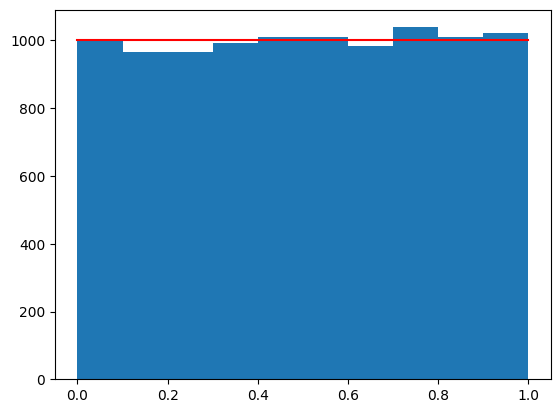

In [18]:
plt.hist(numbers, 10)
plt.plot([0,1], [1000,1000], color = 'r');

In [19]:
print(f'La media de los números es: {np.mean(numbers)} y la varianza: {np.var(numbers)}')

La media de los números es: 0.5045298766805346 y la varianza: 0.08368296791565671


In [20]:
abs(np.mean(numbers) - 1/2)

0.004529876680534617

In [21]:
abs(np.var(numbers) - 1/12)

0.0003496345823233854

## 3. Buscar y almacenar la semilla.

In [22]:
# Se puede fijar la semilla:
np.random.seed(42)
numbers = np.random.uniform(0,1,10_000)

## 4. Simular 10.000 exponenciales de parámetro $\lambda>0$.

La acumulada de una exponencial viene dada por:
$$F_X(x) = 1-\exp(-\lambda x)$$

In [23]:
inv_F_exp = lambda llambda, x : -np.log(1-x)/llambda

In [24]:
numbers_exp = inv_F_exp(2, numbers)

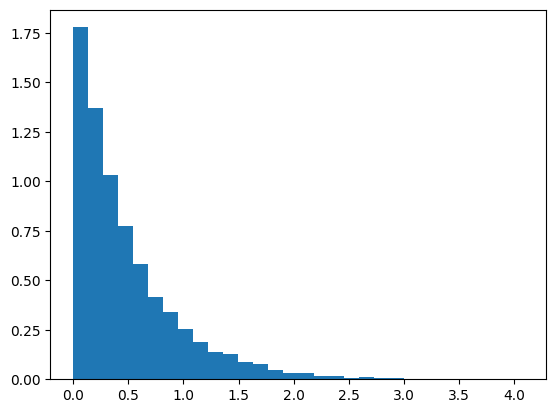

In [25]:
plt.hist(numbers_exp, bins = 30, density = True);

## 5. Simular 10.000 Weibulls con parámetros $\lambda,\gamma>0$.


La acumulada de una Weibull viene dada por:
$$F_X(x) = 1-\exp(-(\lambda x)^\gamma)$$

In [26]:
inv_F_weibull = lambda gamma, llambda, x : (-np.log(1-x))**(1/gamma)/llambda

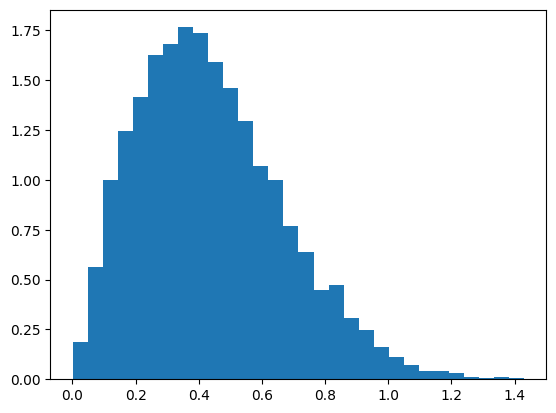

In [27]:
numbers_weibull = inv_F_weibull(2, 2, numbers)
plt.hist(numbers_weibull, bins = 30, density = True);

## 6. Simular una distribución Bernoulli de parámetro $p\in(0,1)$.

La distribución acumulada de la Bernoulli viene dada por:

$$F_X(x) = p \cdot 1_{\{x\leq 0\}} + (1-p) \cdot 1_{\{x\leq 1\}}$$

recuerde que la inversa generalizada se define como:

$$F^{-}(u) = \inf\{x: F(x)\geq u\}, \qquad 0\leq u\leq 1$$

Por lo tanto, $F^-(u) = 1_{\{u > p\}}$

In [28]:
inv_F_bernoulli = np.vectorize(lambda p, x : 1 if x > p else 0)

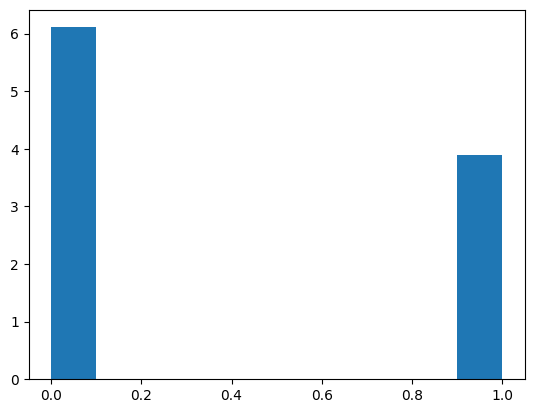

In [29]:
numbers_bernoulli = inv_F_bernoulli(0.6, numbers)
plt.hist(numbers_bernoulli, bins = 10, density = True);

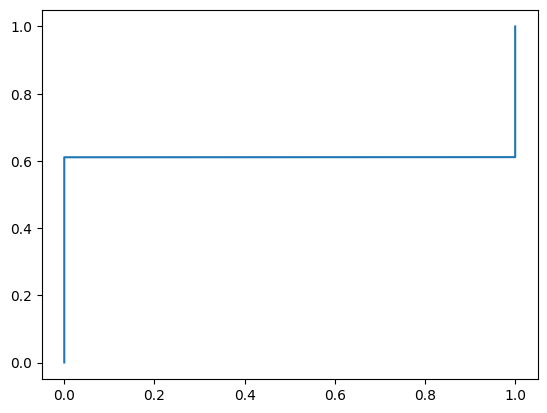

In [30]:
# Acumulada

from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(numbers_bernoulli)
plt.plot(ecdf.x,ecdf.y);

## 7. $\lceil y \rceil \sim ¿?$

Respuesta: $\lceil y \rceil \sim Unif\{1,\ldots,n\}$